In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
# Load the datasets
dataset1 = 'dataset1.csv'
dataset2 = 'dataset2.csv'

# Read dataset1 for gender information and dataset2 for screen time data
df1 = pd.read_csv(dataset1)
df2 = pd.read_csv(dataset2)


In [41]:
# Merge the two datasets on 'ID' to combine gender with screen time data
df_combined = pd.merge(df1[['ID', 'gender']], df2, on='ID')


In [43]:
# Define labels for gender (0 for females, 1 for males)
gender_labels = ['Female', 'Male']

In [45]:
# Define colors for each gender
colors = ['#FF9999', '#99CCFF']  # Pinkish for females, bluish for males

In [47]:
# Perform descriptive statistics grouped by gender
screen_time_by_gender = df_combined.groupby('gender').agg(
    mean_C_wk=('C_wk', 'mean'),
    median_C_wk=('C_wk', 'median'),
    std_C_wk=('C_wk', 'std'),
    
    mean_C_we=('C_we', 'mean'),
    median_C_we=('C_we', 'median'),
    std_C_we=('C_we', 'std'),
    
    mean_S_wk=('S_wk', 'mean'),
    median_S_wk=('S_wk', 'median'),
    std_S_wk=('S_wk', 'std'),
    
    mean_S_we=('S_we', 'mean'),
    median_S_we=('S_we', 'median'),
    std_S_we=('S_we', 'std'),
    
    mean_T_wk=('T_wk', 'mean'),
    median_T_wk=('T_wk', 'median'),
    std_T_wk=('T_wk', 'std'),
    
    mean_T_we=('T_we', 'mean'),
    median_T_we=('T_we', 'median'),
    std_T_we=('T_we', 'std')
).reset_index()


In [49]:
# Display the descriptive statistics table
screen_time_by_gender


,gender,mean_C_wk,median_C_wk,std_C_wk,mean_C_we,median_C_we,std_C_we,mean_S_wk,median_S_wk,std_S_wk,mean_S_we,median_S_we,std_S_we,mean_T_wk,median_T_wk,std_T_wk,mean_T_we,median_T_we,std_T_we
0,0,1.870337,1.0,1.792003,2.286876,2.0,2.123464,3.459527,3.0,2.345233,4.155127,4.0,2.418278,2.631471,2.0,1.733142,3.739278,4.0,1.948377
1,1,1.656999,1.0,1.662708,2.080882,1.0,2.021145,2.305689,2.0,2.177720,2.813664,2.0,2.391558,2.497385,2.0,1.652683,3.553557,3.0,1.955798


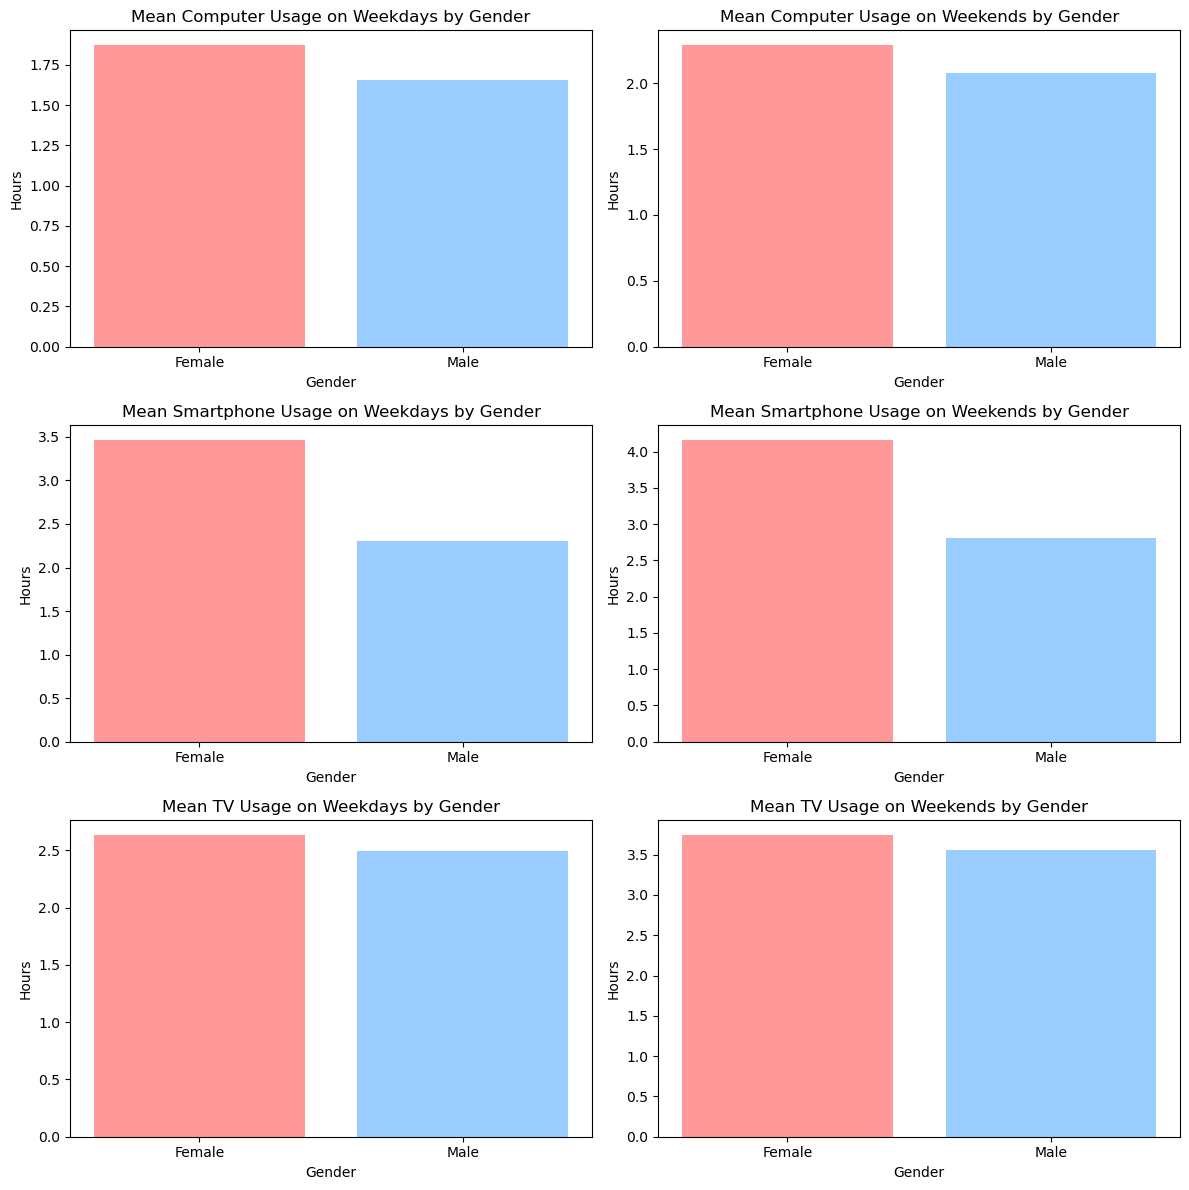

In [51]:
# Titles for each plot
titles = [
    ('Mean Computer Usage on Weekdays by Gender', 'Mean Computer Usage on Weekends by Gender'),
    ('Mean Smartphone Usage on Weekdays by Gender', 'Mean Smartphone Usage on Weekends by Gender'),
    ('Mean TV Usage on Weekdays by Gender', 'Mean TV Usage on Weekends by Gender')
]

# Corresponding columns from the DataFrame
columns = [
    ('mean_C_wk', 'mean_C_we'),
    ('mean_S_wk', 'mean_S_we'),
    ('mean_T_wk', 'mean_T_we')
]

# Create subplots for weekday and weekend usage of computers, smartphones, and TV by gender
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Loop through each row (0: Computer, 1: Smartphone, 2: TV)
for i in range(3):
    # Weekday plot (left)
    axes[i, 0].bar(gender_labels, screen_time_by_gender[columns[i][0]], color=colors)
    axes[i, 0].set_title(titles[i][0])
    axes[i, 0].set_xlabel('Gender')
    axes[i, 0].set_ylabel('Hours')

    # Weekend plot (right)
    axes[i, 1].bar(gender_labels, screen_time_by_gender[columns[i][1]], color=colors)
    axes[i, 1].set_title(titles[i][1])
    axes[i, 1].set_xlabel('Gender')
    axes[i, 1].set_ylabel('Hours')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()